In [1]:
# Import packages and use shorthand (data, plt, pd)

import pandas as pd                   # data analysis library
import matplotlib.pyplot as plt       # data visualization library
import seaborn as sns                 # enhanced data visualization library
import numpy as np                    # numerical computational library
import datetime as dt                 # date & time manipulation library


from pandas_datareader import data    # remote data access for Pandas
from random import choice             # randomly select an item from a list of items

In [2]:
# Downloading packages
#import sys                  # To install packages from your Jupyter Notebook

#!{sys.executable} -m pip install datetime
#!{sys.executable} -m pip install pandas_datareader

In [12]:
def MR_get(tickers, start_date, end_date):
    adj_close = data.DataReader(tickers, 
                                data_source = 'yahoo', 
                                start       = start_date, 
                                end         = end_date)['Adj Close']
    
    return adj_close

In [13]:
# Stock Tickers & Weights

# Stock tickers
tickers = ['PRGO', 'CNC', 'CVS', 'CI', 'UHS', 'TAP', 'SJM', 'ADM', 'TSN', 'COTY', 'PVH', 'CCL', 'MHK', 'F', 'KSS', 'XRX', 'NLOK', 'FIS', 'DXC', 'WDC', 'MRO', 'HFC', 'NOV', 'FANG', 'KMI']

# Need some weights for where we have our money
weights = pd.Series(index = tickers, dtype = float)   # list to hold our weights
#weights[tickers] = [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04]                  # specific weights per ticker
weights[tickers] = 1/len(tickers)                     # equal weights per ticker

# Check our list of stock tickers & weights
weights

PRGO    0.04
CNC     0.04
CVS     0.04
CI      0.04
UHS     0.04
TAP     0.04
SJM     0.04
ADM     0.04
TSN     0.04
COTY    0.04
PVH     0.04
CCL     0.04
MHK     0.04
F       0.04
KSS     0.04
XRX     0.04
NLOK    0.04
FIS     0.04
DXC     0.04
WDC     0.04
MRO     0.04
HFC     0.04
NOV     0.04
FANG    0.04
KMI     0.04
dtype: float64

In [15]:
# Quick recap on indexing
#weights[0]
#weights['PRGO']

#weights[1]
#weights['CNC']

#weights[2]
#weights['CVS']

0.04

In [16]:
# Lookback Period, Returns, Mu, & Sigma

# Lookback period
start_date = '2015-01-01'           # start day for lookback
end_date   = '2020-12-31'           # end day for lookback                            
#end_date   = dt.datetime.today()   # automatically get today's date

# Pull Adj Close data
adj_close = MR_get(tickers, start_date, end_date)

# Compute Returns from the Adj Close
returns = adj_close[tickers].pct_change()
    
# Remove the NA from returns; we always get 1 fewer returns than data
returns = returns.dropna()

# Calculate mu (Expected Returns) and sigma (Volatility) of stocks
mu    = returns.mean() 
sigma = returns.std()  

In [17]:
# Check Portfolio
returns

Symbols,PRGO,CNC,CVS,CI,UHS,TAP,SJM,ADM,TSN,COTY,...,XRX,NLOK,FIS,DXC,WDC,MRO,HFC,NOV,FANG,KMI
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.010322,-0.002681,-0.009884,-0.017213,-0.020456,-0.006093,-0.016322,-0.034602,-0.023029,-0.002937,...,-0.021818,-0.014068,-0.017305,-0.020237,-0.013221,-0.046503,-0.043184,-0.045656,-0.044218,-0.027096
2015-01-06,-0.001880,0.003264,0.000743,0.003958,0.000368,-0.004768,-0.007992,-0.019714,0.005893,-0.007364,...,-0.013383,-0.015458,-0.001304,0.002582,-0.022300,-0.015035,-0.011691,-0.012320,0.001571,-0.019688
2015-01-07,0.016707,0.005455,0.018041,0.023458,0.029888,0.032028,0.022335,0.015032,0.012226,0.003462,...,0.012811,0.009259,0.016490,0.007243,0.015018,0.012286,-0.021183,0.000972,0.015339,0.013225
2015-01-08,0.022826,0.015418,0.021266,0.050944,0.010269,0.030902,0.014465,-0.014609,0.036739,0.008378,...,0.027530,0.018349,0.014134,0.011345,0.020714,0.020228,0.031197,0.029778,0.048755,0.023447
2015-01-09,-0.008296,-0.007686,-0.000510,-0.010355,-0.002563,-0.001930,-0.006392,-0.008530,-0.020631,-0.029325,...,-0.005793,-0.006659,-0.003326,0.015800,0.016670,-0.003244,-0.026710,-0.027503,0.012277,-0.012518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0.008016,-0.011247,-0.000588,-0.000754,-0.000949,0.001763,0.007988,0.001824,0.003718,-0.031039,...,-0.008780,0.003817,0.045134,0.000437,-0.000200,-0.026432,-0.003929,-0.009538,0.009414,0.000000
2020-12-28,0.014542,0.013961,0.001618,0.016748,-0.002921,0.000220,0.002067,0.005259,-0.006328,-0.018106,...,0.031001,-0.000951,-0.003622,0.050655,0.002805,0.000000,-0.005128,0.004444,-0.012850,-0.013738
2020-12-29,-0.002240,0.003400,-0.002644,0.009349,-0.002564,0.001319,-0.008596,-0.005030,-0.013669,-0.026950,...,-0.015893,-0.009039,0.007200,-0.016625,-0.035358,-0.009050,0.001983,-0.005900,-0.013227,-0.005132


In [18]:
# Check Expected Returns (𝜇)
mu

Symbols
PRGO   -0.000523
CNC     0.000832
CVS     0.000026
CI      0.000673
UHS     0.000411
TAP    -0.000067
SJM     0.000310
ADM     0.000237
TSN     0.000569
COTY    0.000050
PVH     0.000245
CCL     0.000211
MHK     0.000263
F       0.000039
KSS     0.000477
XRX     0.000249
NLOK    0.000668
FIS     0.000726
DXC     0.000663
WDC     0.000101
MRO    -0.000203
HFC     0.000322
NOV    -0.000499
FANG    0.000497
KMI    -0.000325
dtype: float64

In [19]:
# Check Volatility (𝜎)
sigma

Symbols
PRGO    0.024435
CNC     0.023582
CVS     0.017046
CI      0.020231
UHS     0.022606
TAP     0.018595
SJM     0.014909
ADM     0.016488
TSN     0.019285
COTY    0.036459
PVH     0.029650
CCL     0.034228
MHK     0.025137
F       0.020189
KSS     0.033569
XRX     0.025432
NLOK    0.020829
FIS     0.016268
DXC     0.033119
WDC     0.029545
MRO     0.036595
HFC     0.029897
NOV     0.030872
FANG    0.034179
KMI     0.022407
dtype: float64

In [20]:
# Initialize Monte Carlo parameters
monte_carlo_runs = 1000
days_to_simulate = 5
loss_cutoff      = 0.95            # count any losses larger than 5% (or -5%)

In [21]:
# Parametric

compound_returns  = sigma.copy()
total_simulations = 0
bad_simulations   = 0

for run_counter in range(0,monte_carlo_runs):   # Loop over runs    
    for i in tickers:                      # loop over tickers, below is done once per ticker
        
        # Loop over simulated days:
        compounded_temp = 1
        
        for simulated_day_counter in range(0,days_to_simulate): # loop over days
            
            # Draw from 𝑁~(𝜇,𝜎)
            ######################################################
            simulated_return = np.random.normal(mu[i],sigma[i],1)
            ######################################################
            
            compounded_temp = compounded_temp * (simulated_return + 1)        
        
        compound_returns[i] = compounded_temp     # store compounded returns
    
    # Now see if those returns are bad by combining with weights
    portfolio_return = compound_returns.dot(weights) # dot product
    
    if(portfolio_return < loss_cutoff):
        bad_simulations = bad_simulations + 1
    
    total_simulations = total_simulations + 1

print("Your portfolio will lose", round((1-loss_cutoff)*100,3), "%",
      "over", days_to_simulate, "days", 
      bad_simulations/total_simulations, "of the time.")

Your portfolio will lose 5.0 % over 5 days 0.0 of the time.


In [22]:
# Bootstrap

compound_returns  = sigma.copy()
total_simulations = 0
bad_simulations   = 0

for run_counter in range(0,monte_carlo_runs):   # Loop over runs    
    for i in tickers:                           # loop over tickers, below is done once per ticker
        
        # Loop over simulated days:
        compounded_temp = 1
        
        for simulated_day_counter in range(0,days_to_simulate): # loop over days
            
            # Draw from historical returns
            ####################################
            simulated_return = choice(returns[i])
            ####################################
            
            compounded_temp = compounded_temp * (simulated_return + 1)        
        
        compound_returns[i] = compounded_temp     # store compounded returns
    
    # Now see if those returns are bad by combining with weights
    portfolio_return = compound_returns.dot(weights) # dot product
    
    if(portfolio_return < loss_cutoff):
        bad_simulations = bad_simulations + 1
    
    total_simulations = total_simulations + 1

print("Your portfolio will lose", round((1-loss_cutoff)*100,3), "%",
      "over", days_to_simulate, "days", 
      bad_simulations/total_simulations, "of the time.")

Your portfolio will lose 5.0 % over 5 days 0.0 of the time.


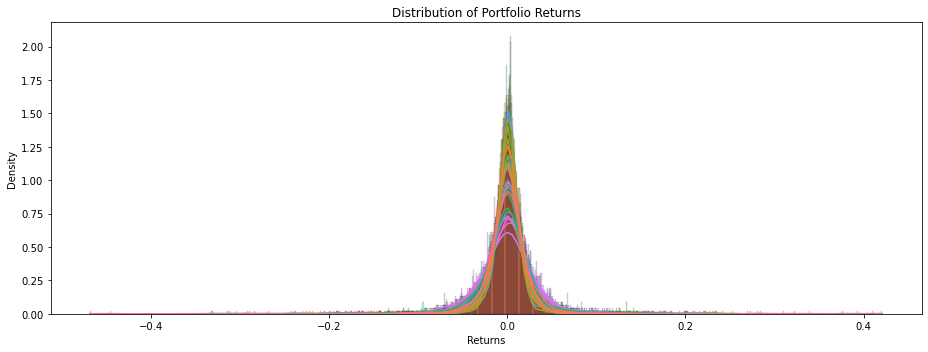

In [23]:
# Plot Returns

# setting figure size
fig, ax = plt.subplots(figsize = (13, 5))


# histogram for returns
sns.histplot(data  = returns,      # data set - index Facebook (or AAPL or GOOG)
             bins  = 'fd',         # number of bins ('fd' = Freedman-Diaconis Rule) 
             kde   = True,         # kernel density plot (line graph)
             alpha = 0.3,          # transparency of colors
             stat  = 'density')    # can be set to 'count', 'frequency', or 'probability'


# this adds a title
plt.title(label = "Distribution of Portfolio Returns")


# this adds an x-label
plt.xlabel(xlabel = 'Returns')


# this add a y-label
plt.ylabel(ylabel = 'Density')


# remove legend
ax.get_legend().remove()


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()

In [25]:
# New Packages!

##############################################################################
# Downloading packages
#import sys                  # To install packages from your Jupyter Notebook


# Use this to install a dependancy for our yahoo finance package
#!{sys.executable} -m pip install requests_html
#!{sys.executable} -m pip install yahoo_fin

##############################################################################
# Import packages
import yahoo_fin as yf                   # data scraping library
import yahoo_fin.stock_info as si        # module from library for stock_info

In [26]:
# Scrape the table found on the quote page of an input ticker from Yahoo Finance 
quote_table = si.get_quote_table('F', dict_result = False)

quote_table

,attribute,value
0,1y Target Est,11.15
1,52 Week Range,3.96 - 12.15
2,Ask,11.42 x 46000
3,Avg. Volume,7.85148e+07
4,Beta (5Y Monthly),1.2
5,Bid,11.41 x 46000
6,Day's Range,11.38 - 11.62
7,EPS (TTM),-0.32
8,Earnings Date,"Apr 26, 2021 - Apr 30, 2021"
9,Ex-Dividend Date,"Jan 29, 2020"


In [27]:
# Get PE Ratio
quote_table.iloc[13, 1]

nan

In [28]:
# Get Dividends
quote_table.iloc[10, 1]

'N/A (N/A)'

In [29]:
# Scrape Valuation Measures data from statistics page for input ticker
stats_table = si.get_stats_valuation('F')

# Set row index to be the measure for text-based referencing
stats_table.set_index('Unnamed: 0', inplace=True)

stats_table

# Subsetting data for specific values
#stats_table.loc['Enterprise Value 3', 'As of Date: 1/30/2021Current']
#stats_table.iloc[1,0]

,As of Date: 2/9/2021Current,12/31/2020,9/30/2020,6/30/2020,3/31/2020,12/31/2019
Unnamed: 0,,,,,,
Market Cap (intraday) 5,45.99B,36.00B,27.28B,24.90B,19.77B,37.96B
Enterprise Value 3,159.03B,149.73B,146.63B,147.23B,141.84B,156.01B
Trailing P/E,NaN,NaN,NaN,NaN,483.00,23.25
Forward P/E 1,11.98,8.22,8.41,NaN,10.86,6.89
PEG Ratio (5 yr expected) 1,0.61,0.42,0.47,NaN,0.77,0.68
Price/Sales (ttm),0.36,0.27,0.20,0.16,0.12,0.24
Price/Book (mrq),1.50,1.09,0.89,0.84,0.60,1.04
Enterprise Value/Revenue 3,1.25,4.16,3.91,7.60,4.13,3.93
Enterprise Value/EBITDA 6,19.90,-92.94,30.71,40.85,113.84,-1.46k


In [30]:
# Generate list of tickers listed on the Dow Jones
dow_list = si.tickers_dow() 
    # you can also use tickers_nasdaq() or tickers_sp500()

    
# Instantiate dictionary to hold our scraped data    
dow_stats = {}

# Loop through each ticker from the list of tickers
for ticker in dow_list:
    temp = si.get_stats_valuation(ticker)    # scrape valuation measures data
    temp = temp.iloc[:,:2]                   # subset for attribute name & recent values
    temp.columns = ["Attribute", "Recent"]   # rename columns
    dow_stats[ticker] = temp                 # populate prior dictionary

# Check output
dow_stats

{'AAPL':                      Attribute Recent
 0      Market Cap (intraday) 5  2.27T
 1           Enterprise Value 3  2.31T
 2                 Trailing P/E  36.49
 3                Forward P/E 1  31.65
 4  PEG Ratio (5 yr expected) 1   3.00
 5            Price/Sales (ttm)   7.99
 6             Price/Book (mrq)  34.32
 7   Enterprise Value/Revenue 3   7.85
 8    Enterprise Value/EBITDA 6  26.12,
 'AMGN':                      Attribute   Recent
 0      Market Cap (intraday) 5  137.73B
 1           Enterprise Value 3  160.07B
 2                 Trailing P/E    19.37
 3                Forward P/E 1    14.08
 4  PEG Ratio (5 yr expected) 1     1.61
 5            Price/Sales (ttm)     5.53
 6             Price/Book (mrq)    14.64
 7   Enterprise Value/Revenue 3     6.30
 8    Enterprise Value/EBITDA 6    12.32,
 'AXP':                      Attribute   Recent
 0      Market Cap (intraday) 5  102.00B
 1           Enterprise Value 3      NaN
 2                 Trailing P/E    33.60
 3         

In [31]:
# Combine all the valutation measures into a single DataFrame
combined_stats = pd.concat(dow_stats)               # combine
combined_stats = combined_stats.reset_index()       # reset index into integers
combined_stats                                      # check output

,level_0,level_1,Attribute,Recent
0,AAPL,0,Market Cap (intraday) 5,2.27T
1,AAPL,1,Enterprise Value 3,2.31T
2,AAPL,2,Trailing P/E,36.49
3,AAPL,3,Forward P/E 1,31.65
4,AAPL,4,PEG Ratio (5 yr expected) 1,3.00
...,...,...,...,...
265,WMT,4,PEG Ratio (5 yr expected) 1,3.87
266,WMT,5,Price/Sales (ttm),0.75
267,WMT,6,Price/Book (mrq),5.02
268,WMT,7,Enterprise Value/Revenue 3,0.84


In [32]:
# Clean up the combined_stats DataFrame

# Remove unnecessary column
del combined_stats["level_1"]

# Update column names
combined_stats.columns = ["Ticker", "Attribute", "Recent"]
combined_stats

,Ticker,Attribute,Recent
0,AAPL,Market Cap (intraday) 5,2.27T
1,AAPL,Enterprise Value 3,2.31T
2,AAPL,Trailing P/E,36.49
3,AAPL,Forward P/E 1,31.65
4,AAPL,PEG Ratio (5 yr expected) 1,3.00
...,...,...,...
265,WMT,PEG Ratio (5 yr expected) 1,3.87
266,WMT,Price/Sales (ttm),0.75
267,WMT,Price/Book (mrq),5.02
268,WMT,Enterprise Value/Revenue 3,0.84


In [33]:
# P/E Ratio Comparison

# Create filter
pe_ratio_filter = combined_stats["Attribute"] == "Trailing P/E"

# Subset data using filter
pe_ratios = combined_stats[pe_ratio_filter].reset_index()

# Check output
pe_ratios

,index,Ticker,Attribute,Recent
0,2,AAPL,Trailing P/E,36.49
1,11,AMGN,Trailing P/E,19.37
2,20,AXP,Trailing P/E,33.60
3,29,BA,Trailing P/E,NaN
4,38,CAT,Trailing P/E,35.35
5,47,CRM,Trailing P/E,62.70
6,56,CSCO,Trailing P/E,19.64
7,65,CVX,Trailing P/E,43.77
8,74,DIS,Trailing P/E,51.22
9,83,DOW,Trailing P/E,34.90


In [34]:
# Sort by Descending Order
pe_ratios_sorted = pe_ratios.sort_values('Recent', ascending = False)

# Remove unnecessary column
del pe_ratios_sorted["index"]

pe_ratios_sorted

,Ticker,Attribute,Recent
22,NKE,Trailing P/E,81.98
28,WBA,Trailing P/E,78.40
5,CRM,Trailing P/E,62.70
8,DIS,Trailing P/E,51.22
7,CVX,Trailing P/E,43.77
26,V,Trailing P/E,42.56
0,AAPL,Trailing P/E,36.49
21,MSFT,Trailing P/E,36.33
4,CAT,Trailing P/E,35.35
9,DOW,Trailing P/E,34.90


In [35]:
# Get Ford's yearly balance sheet data
ford_bs = si.get_balance_sheet('F', yearly = True)
                 # If you set yearly = False, you will get quarterly data

# Check data
ford_bs

endDate,2020-12-31,2019-12-31,2018-12-31,2017-12-31
Breakdown,,,,
capitalSurplus,2.229000e+10,2.216500e+10,2.200600e+10,2.184300e+10
totalLiab,2.364500e+11,2.253070e+11,2.204740e+11,2.227920e+11
totalStockholderEquity,3.069000e+10,3.318500e+10,3.593200e+10,3.557800e+10
minorityInterest,1.210000e+08,4.500000e+07,1.340000e+08,1.260000e+08
otherCurrentLiab,2.161900e+10,1.959900e+10,1.727000e+10,1.640200e+10
totalAssets,2.672610e+11,2.585370e+11,2.565400e+11,2.584960e+11
commonStock,4.100000e+07,4.100000e+07,4.100000e+07,4.100000e+07
otherCurrentAssets,1.998000e+09,5.471000e+09,3.930000e+09,3.649000e+09
retainedEarnings,1.824300e+10,2.032000e+10,2.266800e+10,2.190600e+10


In [36]:
# Subset Ford BS to show Cash over time
ford_cash = ford_bs.loc['cash', :]

# Sort by highest cash
ford_cash.sort_values(ascending = False)

endDate
2020-12-31    1.089400e+10
2017-12-31    8.934000e+09
2019-12-31    8.437000e+09
2018-12-31    7.111000e+09
Name: cash, dtype: float64

In [39]:
# Generate list of tickers listed on the Dow Jones
dow_list = si.tickers_dow() 
    # you can also use tickers_nasdaq() or tickers_sp500()

    
# Instantiate dictionary to hold our scraped data    
dow_stats = {}

# Loop through each ticker from the list of tickers
for ticker in dow_list:
    temp = si.get_balance_sheet(ticker)     # scrape valuation measures data
    temp = temp.iloc[:,0]                   # subset for attribute name & recent values
    temp.columns = ["2020"]                 # rename columns
    dow_stats[ticker] = temp                # populate prior dictionary

# Check output
#dow_stats

In [38]:
# Combine all the balance sheet data into a single DataFrame
combined_stats = pd.concat(dow_stats)               # combine
combined_stats = combined_stats.reset_index()       # reset index into integers
combined_stats                                      # check output

,level_0,Breakdown,0
0,AAPL,totalLiab,2.585490e+11
1,AAPL,totalStockholderEquity,6.533900e+10
2,AAPL,otherCurrentLiab,4.786700e+10
3,AAPL,totalAssets,3.238880e+11
4,AAPL,commonStock,5.077900e+10
...,...,...,...
782,WMT,netReceivables,6.284000e+09
783,WMT,longTermDebt,4.441000e+10
784,WMT,inventory,4.443500e+10
785,WMT,accountsPayable,4.697300e+10


In [40]:
# Rename columns
combined_stats.columns = ["Ticker", "BS Element", "Value (2020)"]

# Check data
combined_stats

,Ticker,BS Element,Value (2020)
0,AAPL,totalLiab,2.585490e+11
1,AAPL,totalStockholderEquity,6.533900e+10
2,AAPL,otherCurrentLiab,4.786700e+10
3,AAPL,totalAssets,3.238880e+11
4,AAPL,commonStock,5.077900e+10
...,...,...,...
782,WMT,netReceivables,6.284000e+09
783,WMT,longTermDebt,4.441000e+10
784,WMT,inventory,4.443500e+10
785,WMT,accountsPayable,4.697300e+10
